WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


Requirement 1: Create Plot to Showcase the Relationship
Between Weather Variables and Latitude

Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
Processing Record 2 of Set 1 | waitara
Processing Record 3 of Set 1 | yemetsk
Processing Record 4 of Set 1 | maun
Processing Record 5 of Set 1 | trail
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | opuwo
Processing Record 8 of Set 1 | la mana
Processing Record 9 of Set 1 | la'ie
Processing Record 10 of Set 1 | sao vicente
Processing Record 11 of Set 1 | klyuchi
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | pariaman
Processing Record 14 of Set 1 | likiep
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | keflavik
Processing Record 21 of Set 1 | jiangzi
Processing Record 22 of Set 1 | port-aux-francais
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          601
Lat           601
Lng           601
Max Temp      601
Humidity      601
Cloudiness    601
Wind Speed    601
Country       601
Date          601
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,invercargill,-46.4000,168.3500,47.01,78,9,1.99,NZ,1699519335
1,waitara,-38.9250,174.2500,55.49,74,90,15.48,NZ,1699519335
2,yemetsk,63.4721,41.7941,32.31,88,100,5.59,RU,1699519336
3,maun,-19.9833,23.4167,94.71,23,0,9.26,BW,1699519336
4,trail,49.0998,-117.7022,44.98,92,86,1.12,CA,1699519336


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,47.01,78,9,1.99,NZ,1699519335
1,waitara,-38.9250,174.2500,55.49,74,90,15.48,NZ,1699519335
2,yemetsk,63.4721,41.7941,32.31,88,100,5.59,RU,1699519336
3,maun,-19.9833,23.4167,94.71,23,0,9.26,BW,1699519336
4,trail,49.0998,-117.7022,44.98,92,86,1.12,CA,1699519336


Create the Scatter Plots Resquested

Latitude Vs. Temperture

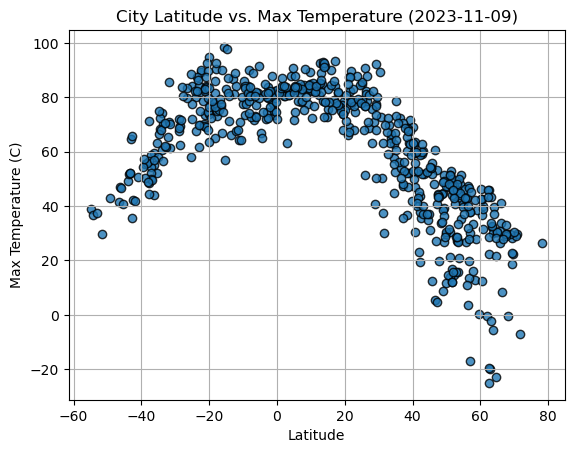

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],
            edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

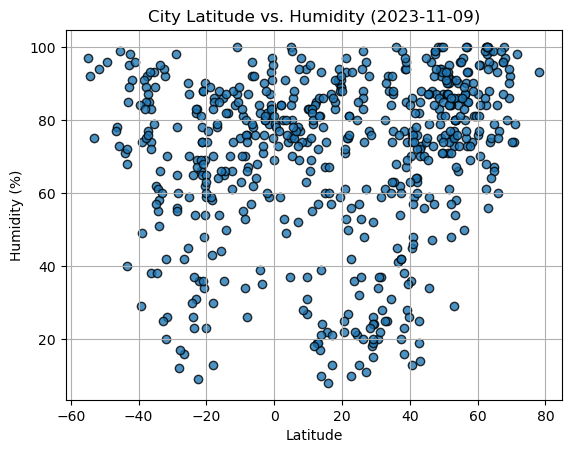

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],
            edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

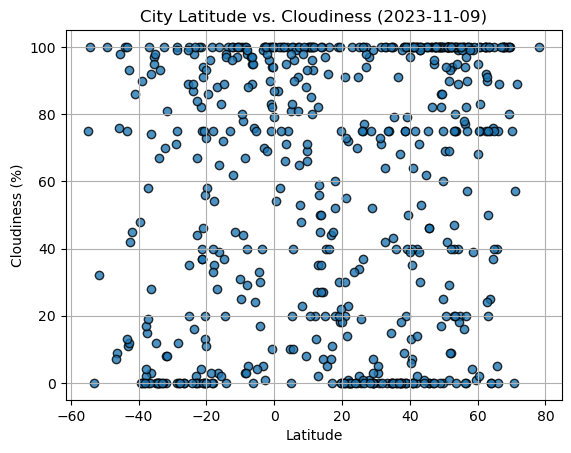

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],
            edgecolor="black", linewidths=1,
            marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude Vs. Wind Speed Plot

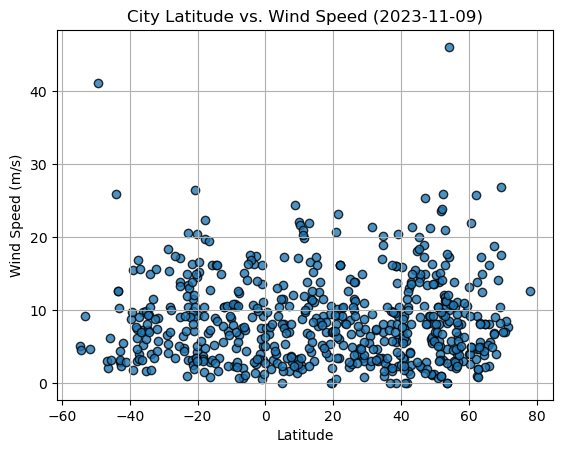

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

Requirement 2: Compute Liner Regression for Each Relationship

In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
        
        # Run regression on hemisphere weather data
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
        
        # Calculate the regression line "y values" from the slope and intercept
        regress_values = x_values * slope + intercept
        
        # Get the equation of the line
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create a scatter plot and plot the regression line
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        
        # Annotate the text for the line equation
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.xlabel('Latitude')
        plt.ylabel(title)
        print(f"The r-value is: {r_value}")
        plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,yemetsk,63.4721,41.7941,32.31,88,100,5.59,RU,1699519336
4,trail,49.0998,-117.7022,44.98,92,86,1.12,CA,1699519336
8,la'ie,21.6477,-157.9253,78.76,75,23,5.99,US,1699519337
10,klyuchi,52.2667,79.1667,43.68,48,9,9.26,RU,1699519338
11,iqaluit,63.7506,-68.5145,29.93,74,75,17.27,CA,1699519339


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,invercargill,-46.4000,168.3500,47.01,78,9,1.99,NZ,1699519335
1,waitara,-38.9250,174.2500,55.49,74,90,15.48,NZ,1699519335
3,maun,-19.9833,23.4167,94.71,23,0,9.26,BW,1699519336
5,waitangi,-43.9535,-176.5597,49.33,71,100,25.88,NZ,1699519336
6,opuwo,-18.0607,13.8400,90.52,13,0,1.54,NaN,1699519337


Temperture Vs. Latitude Linear Regression Plot

The r-value is: -0.8502651472077967


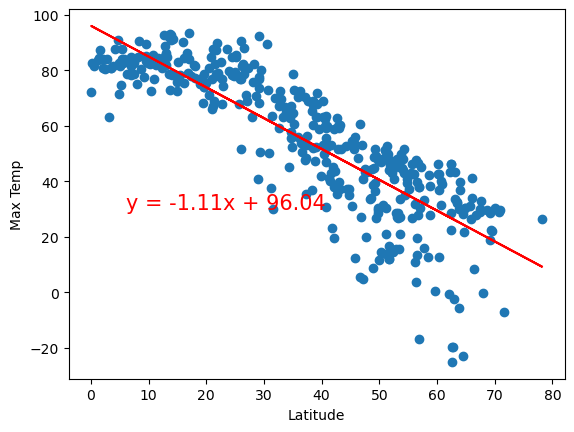

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values,
                       'Max Temp',(6,30))
plt.show()


The r-value is: 0.7125067593875283


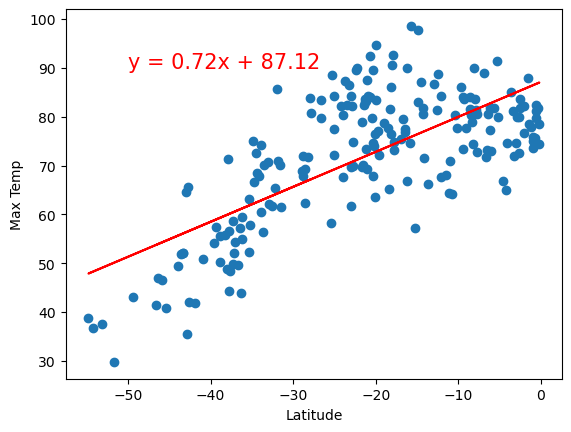

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values,
                       'Max Temp',(-50,90))
plt.show()

Discussion about the linear realationship:

For the Northern Hemisphere, the plot shows a strong negative correlation between latitude and maximum temperature, as indicated by the regression line with a slope of -1.11. This suggests that as one moves further north away from the equator, the maximum temperature tends to decrease substantially. The r-value of -0.85 further confirms a strong negative correlation, which is consistent with the understanding that temperatures are generally cooler at higher latitudes due to the angle of the sun's rays being more oblique.

In the Southern Hemisphere, the relationship is positive, with a regression line slope of 0.72. This indicates that as one moves closer to the equator (increasing latitude from negative to zero), the maximum temperature generally increases. The r-value of 0.71 demonstrates a strong positive correlation, supporting the concept that temperatures rise as one approaches the equator from the southern latitudes.

Humidity Vs. Latitude Linear Regression Plot

The r-value is: 0.28525195803066017


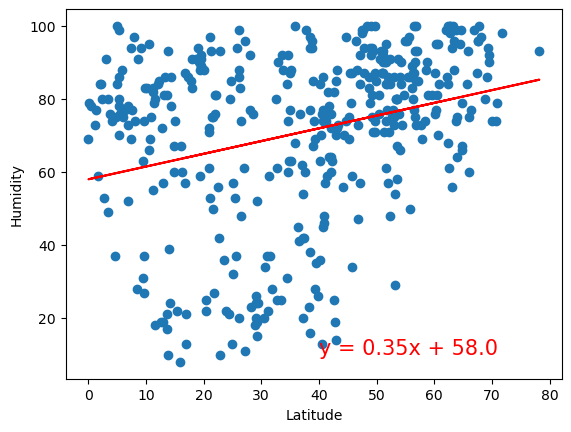

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values,
                       'Humidity',(40,10))
plt.show()

The r-value is: 0.012634417987082387


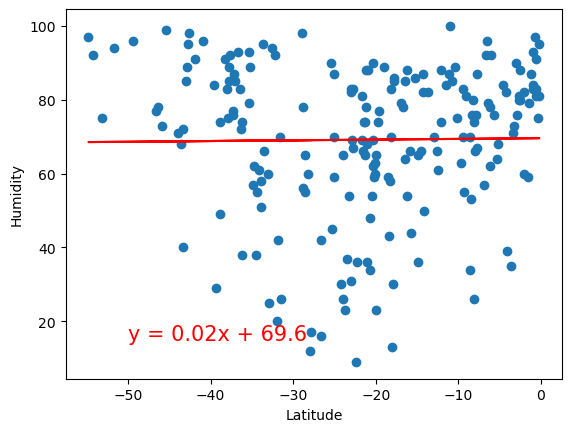

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values,
                       'Humidity',(-50,15))
plt.show()

Discussion about the linear relationship:

For the Northern Hemisphere, there is a slight positive correlation between latitude and humidity, indicated by the regression line with a slope of 0.35. The r-value of 0.285 suggests a weak to moderate positive relationship, implying that as latitude increases, there is a slight tendency for humidity to increase as well, although many other factors likely influence humidity since the correlation is not strong.

In the Southern Hemisphere, the regression line is nearly flat with a slope of 0.02, and the r-value is extremely low at 0.0126, indicating an almost nonexistent correlation. This suggests that in the Southern Hemisphere, latitude has little to no direct relationship with humidity, which remains relatively constant across different latitudes, or any slight trend is overshadowed by other factors.

Cloudiness Vs. Latitude Linear Regression Plot

The r-value is: 0.13135960458507068


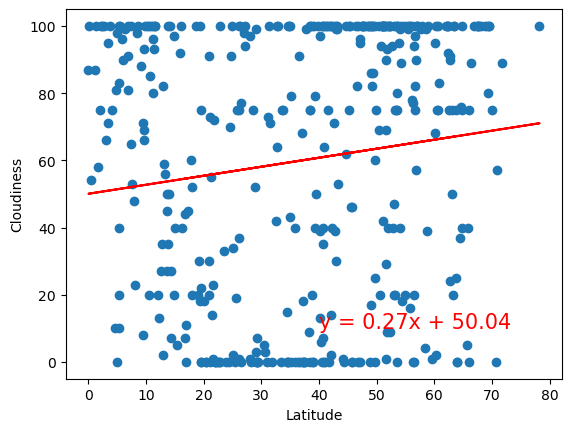

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values,
                       'Cloudiness',(40,10))
plt.show()

The r-value is: 0.2516371452435751


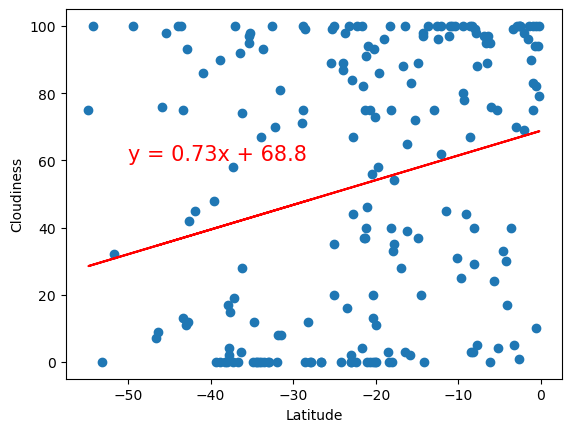

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values,
                       'Cloudiness',(-50,60))
plt.show()

Discussion about the linear relationship:

In the Northern Hemisphere, the regression line shows a slight positive correlation between latitude and cloudiness, with a slope of 0.27. The r-value of about 0.13 suggests a weak correlation, indicating that as one moves north, there might be a small increase in cloudiness, but the relationship is not very strong, and cloudiness is likely influenced by many other factors.

The Southern Hemisphere presents a more pronounced positive correlation, as indicated by the slope of 0.73. The r-value here is about 0.25, which suggests a weak to moderate correlation. This implies that as one moves closer to the equator (from negative to zero latitude), cloudiness tends to increase slightly more noticeably than in the Northern Hemisphere.

Wind Speed Vs. Latitude Linear Regression Plot

The r-value is: 0.0381927057832191


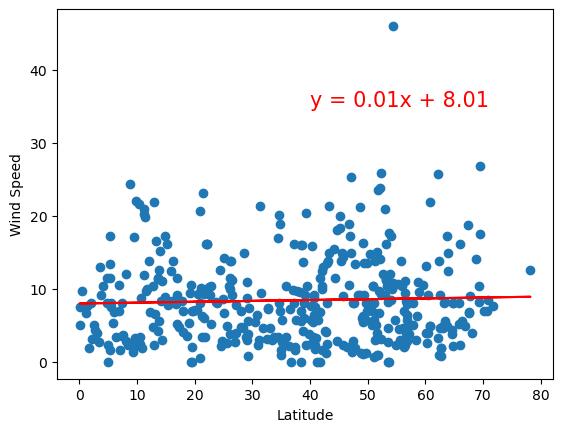

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values,
                       'Wind Speed',(40,35))
plt.show()

The r-value is: -0.02281107644707897


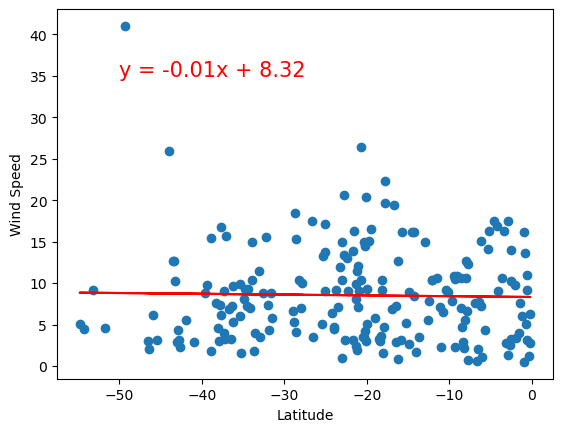

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values,
                       'Wind Speed',(-50,35))
plt.show()

Discussion about the linear relationship:

In the Northern Hemisphere, the regression line has a very slight positive slope (0.01), and the r-value is approximately 0.038, which indicates a very weak positive correlation. This suggests that there is almost no relationship between latitude and wind speed in the Northern Hemisphere, meaning that as we move northward from the equator, there is no significant change in wind speed.

In contrast, the Southern Hemisphere shows a very slight negative slope (-0.01) in the regression line, with an r-value of about -0.022. This also indicates a very weak negative correlation, suggesting that as one moves northward towards the equator in the Southern Hemisphere, there is a minimal decrease in wind speed.